SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.(target)
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
filepath='C:\\Users\\Jeong SeungJu\\OneDrive\\바탕 화면\\house-prices-advanced-regression-techniques\\'
train=pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')
train2=train.copy()

In [37]:
print("train size : ",train.shape)
print("test size : ",test.shape)

train size :  (1460, 81)
test size :  (1459, 80)


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
test.info()
cust_id=test['Id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

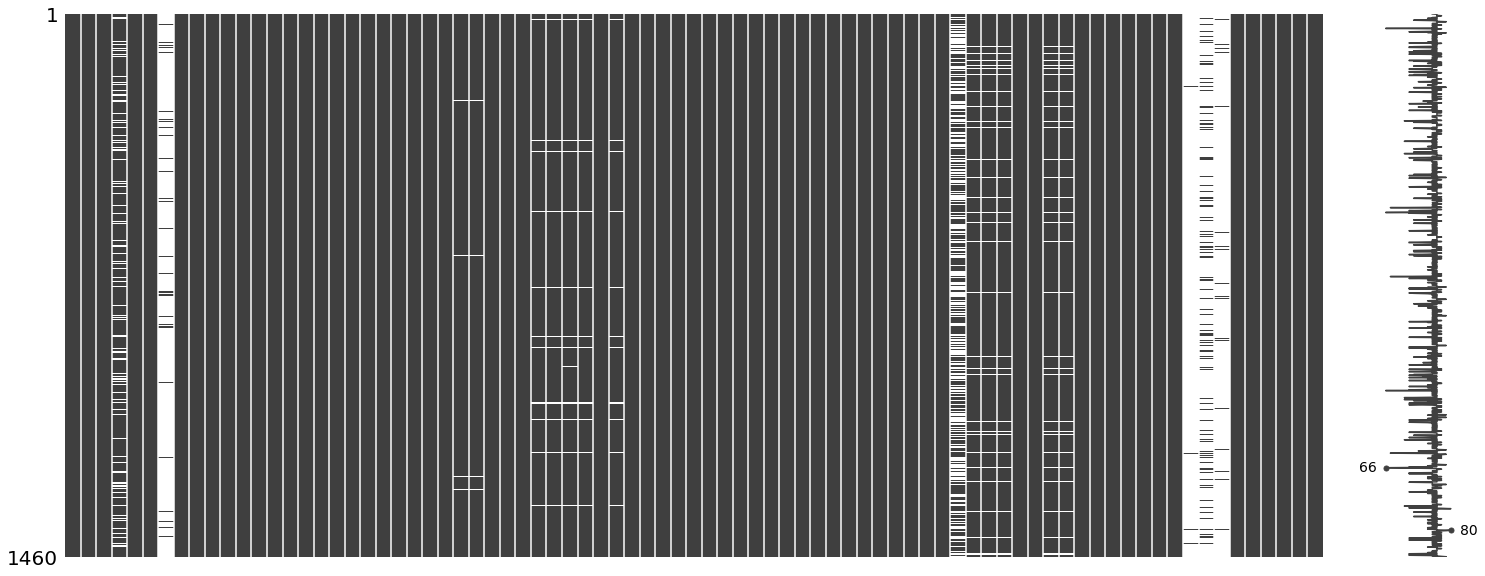

In [40]:
msno.matrix(train)

In [41]:
#missing data column(train)
a=[]
for x in train.columns:
    if train[x].isnull().sum()>0:
        a.append(x)

In [42]:
a

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [43]:
for x in a:
    print(x,": ",train[x].unique(),"\n")
    print("missing count : ",train[x].isnull().sum(),"\n")

LotFrontage :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

missing count :  259 

Alley :  [nan 'Grvl' 'Pave'] 

missing count :  1369 

MasVnrType :  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan] 

missing count :  8 

MasVnrArea :  [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e

In [44]:
#missing data 
#LotFrontage,MasVnrArea : mean
#rst : if missings are to many(minimum 300), drop else mode
for i in a:
    if train[i].dtypes=='object':
        if train[i].isnull().sum()<300:
            train[i].fillna(value=train[i].mode()[0],inplace=True)
        else:
            train.drop(i,axis=1,inplace=True)
    elif i=='GarageYrBlt':
        train[i].fillna(value=train[i].mode()[0],inplace=True)
    else:
        train[i].fillna(np.mean(train[i]),inplace=True)

In [45]:
#GarageYrBlt Dtype change
train['GarageYrBlt']=train['GarageYrBlt'].astype(int)

In [46]:
#id column drop
train.drop(['Id'],axis=1,inplace=True)

In [47]:
#missing data column(test)
b=[]
for y in test.columns:
    if test[y].isnull().sum()>0:
        b.append(y)

for y in b:
    print(y,": ",test[y].unique(),"\n")
    print("missing count : ",test[y].isnull().sum(),"\n")

MSZoning :  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan] 

missing count :  4 

LotFrontage :  [ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83.  64.  82.  38.  89.  35.  58.  66.  93.
  31.  76.  28.  61.  95. 129.  59.  77.  96.  47.  34. 117.  48.  62.
  42. 106. 112.  32. 115.  71.  45. 109. 113. 125. 101. 104. 108. 130.
 135.  36.  55. 136.  97.  91.  37.  22. 103.  99.  40. 123.  54. 107.
 150. 160. 195. 128.  33. 118. 134. 155. 126.  46. 149. 200. 121. 131.
 114.  49. 133. 140.] 

missing count :  227 

Alley :  [nan 'Pave' 'Grvl'] 

missing count :  1352 

Utilities :  ['AllPub' nan] 

missing count :  2 

Exterior1st :  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock'] 

missing count :  1 

Exterior2nd :  ['Vin

In [48]:
for i in b:
    if (test[i].dtypes=='object')|(test[i].isnull().sum()<5):
        if test[i].isnull().sum()<300:
            test[i].fillna(value=test[i].mode()[0],inplace=True)
        else:
            test.drop(i,axis=1,inplace=True)
    elif i=='GarageYrBlt':
        test[i].fillna(value=test[i].mode()[0],inplace=True)
    else:
        test[i].fillna(np.mean(test[i]),inplace=True)

In [49]:
test.drop(['Id'],axis=1,inplace=True)

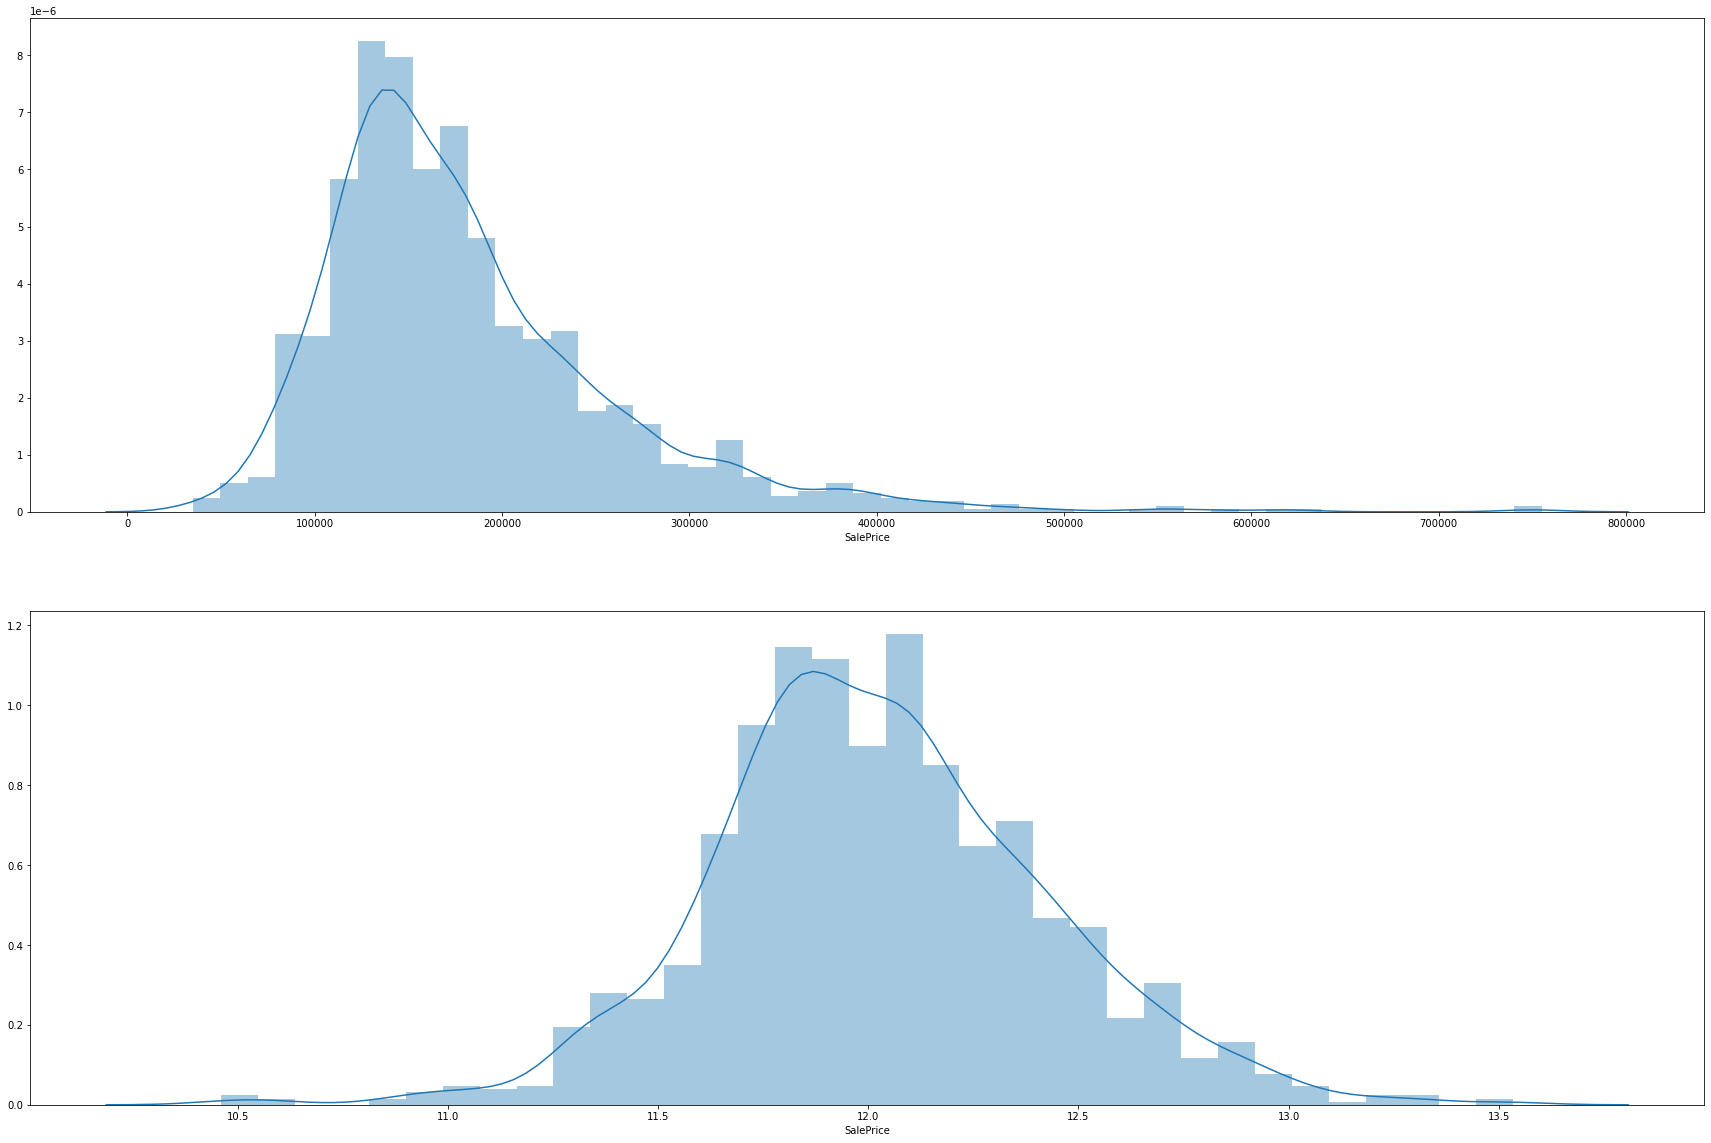

In [50]:
#EDA(target variable)
fig,(ax1,ax2)=plt.subplots(2,1)
fig.set_size_inches(30,20)
sns.distplot(train['SalePrice'],ax=ax1)
sns.distplot(np.log1p(train['SalePrice']),ax=ax2)

train['SalePrice']=np.log1p(train['SalePrice'])

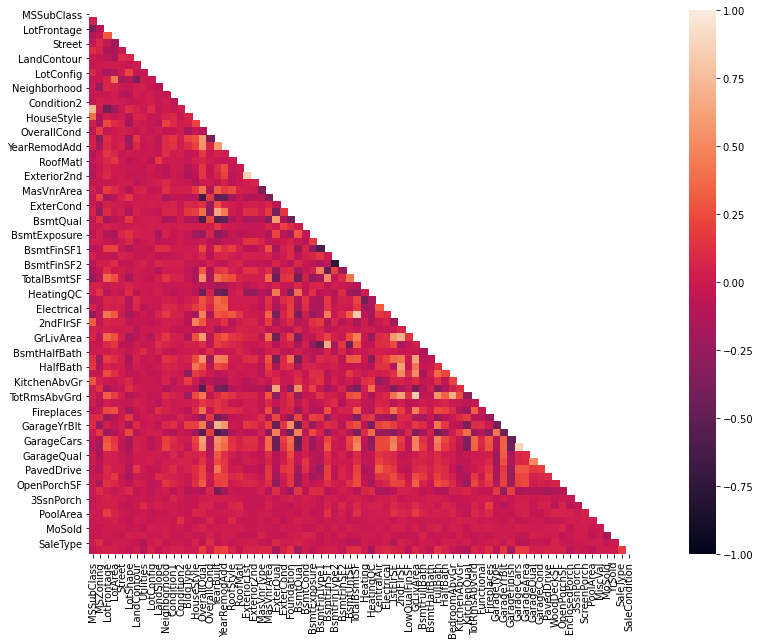

In [51]:
#EDA & DIMENTION REDUCTION
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#TRAIN DATA ENCODER
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=LabelEncoder().fit_transform(train[i])

        
#TEST DATA ENCODER
for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=LabelEncoder().fit_transform(test[i])
        
object=train.iloc[:,:-1]
cor=object.corr()

mask=np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

figure, ax=plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(cor,mask=mask,vmin=-1,vmax=1,square=True)

In [4]:
std=StandardScaler().fit_transform(object)
pca=PCA()
pca.fit_transform(std)

compname="principal component"
variance=pd.DataFrame(pca.explained_variance_,index=[compname+" "+str(i) for i in range(1,train.shape[1])],columns=["PCA explained variance"])
varratio=pd.DataFrame(pca.explained_variance_ratio_,index=[compname+" "+str(i) for i in range(1,train.shape[1])],columns=["PCA explained variance_ratio"])
cumratio=pd.DataFrame(pca.explained_variance_ratio_.cumsum(),index=[compname+" "+str(i) for i in range(1,train.shape[1])],columns=["Cum Ratio"])

pcasum=pd.concat([variance,varratio,cumratio],axis=1)
print(pcasum)
print("PCA explained variance >= 1 count : ",pcasum[pcasum['PCA explained variance']>=1].shape[0])
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_,color='red')
plt.title("Scree Plot")
plt.show()


NameError: name 'StandardScaler' is not defined

In [53]:
#24 comp
trainpca=pca.fit_transform(std)[:,:24]

In [54]:
#TEST PCA
stdtest=StandardScaler().fit_transform(test)
pcatest=PCA(n_components=24)
pcatest=pcatest.fit_transform(stdtest)

In [55]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [56]:
X_train=trainpca
y_train=train2['SalePrice'].values
X_test=pcatest

#LINEAR REGRESSION(NO PARAMETER)
model=LinearRegression().fit(X_train,y_train)
pred=model.predict(X_test)
linearsol=np.round(pred,2)

#XGBOOST REGRESSOR
def print_best_params(model,params):
    gridmodel=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
    gridmodel.fit(X_train,y_train)
    print('{0} 모델 최적의 파라미터 : {1}'.format(model.__class__.__name__,gridmodel.best_params_))
model2=XGBRegressor(n_estimators=1000,learning_rate=0.05,colsample_bytree=0.5,subsample=0.8)
print(print_best_params(model2,{'n_estimators':[1,50,100,300,500,800,1000]}))

XGBRegressor 모델 최적의 파라미터 : {'n_estimators': 1000}
None


In [57]:
#XGBOOST REGRESSOR(PARAMETER=1000)
model2.fit(X_train,y_train)
pred2=np.round(model2.predict(X_test),2)

In [65]:
submit=pd.DataFrame({"Id":cust_id,"SalePrice":pred})
submit.to_csv("house price prediction.csv",index=False)